In [1]:
import time
from pathlib import Path

import cv2
import matplotlib.pyplot as plt
import numpy as np

## Image capture

Available media devices (with names)

In [2]:
!v4l2-ctl --list-devices

pispbe (platform:1000880000.pisp_be):
	/dev/video20
	/dev/video21
	/dev/video22
	/dev/video23
	/dev/video24
	/dev/video25
	/dev/video26
	/dev/video27
	/dev/video28
	/dev/video29
	/dev/video30
	/dev/video31
	/dev/video32
	/dev/video33
	/dev/video34
	/dev/video35
	/dev/media0
	/dev/media1

rpi-hevc-dec (platform:rpi-hevc-dec):
	/dev/video19
	/dev/media2

DMM 37UX226-ML (usb-xhci-hcd.1-1):
	/dev/video0
	/dev/video1
	/dev/media3



Available camera controls

In [3]:
!v4l2-ctl -d /dev/video0 --list-ctrls


User Controls

                     brightness 0x00980900 (int)    : min=0 max=1023 step=1 default=50 value=50
                           gain 0x00980913 (int)    : min=0 max=1957 step=1 default=0 value=0

Camera Controls

                  auto_exposure 0x009a0901 (menu)   : min=0 max=3 default=3 value=3 (Aperture Priority Mode)
         exposure_time_absolute 0x009a0902 (int)    : min=1 max=300000 step=1 default=3 value=3 flags=inactive


Available video formats and frame sizes

In [4]:
!v4l2-ctl -d /dev/video0 --list-formats-ext

ioctl: VIDIOC_ENUM_FMT
	Type: Video Capture

	[0]: 'GREY' (8-bit Greyscale)
		Size: Discrete 4000x3000
			Interval: Discrete 0.033s (30.000 fps)
			Interval: Discrete 0.067s (15.000 fps)
			Interval: Discrete 0.200s (5.000 fps)
			Interval: Discrete 1.000s (1.000 fps)
		Size: Discrete 3840x2160
			Interval: Discrete 0.033s (30.000 fps)
			Interval: Discrete 0.067s (15.000 fps)
			Interval: Discrete 0.200s (5.000 fps)
			Interval: Discrete 1.000s (1.000 fps)
		Size: Discrete 1920x1080
			Interval: Discrete 0.033s (30.000 fps)
			Interval: Discrete 0.067s (15.000 fps)
			Interval: Discrete 0.200s (5.000 fps)
			Interval: Discrete 1.000s (1.000 fps)
		Size: Discrete 640x480
			Interval: Discrete 0.033s (30.000 fps)
			Interval: Discrete 0.067s (15.000 fps)
			Interval: Discrete 0.200s (5.000 fps)
			Interval: Discrete 1.000s (1.000 fps)
	[1]: 'Y16 ' (16-bit Greyscale)
		Size: Discrete 4000x3000
			Interval: Discrete 0.067s (15.000 fps)
			Interval: Discrete 0.200s (5.000 fps)
			Interval:

Current video format

In [5]:
!v4l2-ctl -d /dev/video0 --get-fmt-video

Format Video Capture:
	Width/Height      : 4000/3000
	Pixel Format      : 'GREY' (8-bit Greyscale)
	Field             : None
	Bytes per Line    : 4000
	Size Image        : 12000000
	Colorspace        : sRGB
	Transfer Function : Default (maps to sRGB)
	YCbCr/HSV Encoding: Default (maps to ITU-R 601)
	Quantization      : Default (maps to Full Range)
	Flags             : 


In [42]:
max_cameras_to_check = 10
available_cameras = []
print(f"Checking camera indices 0 to {max_cameras_to_check - 1}...")
for i in range(max_cameras_to_check):
    cap = cv2.VideoCapture(i)
    if cap is not None and cap.isOpened():
        print(f"  Camera found at index: {i}")
        available_cameras.append(i)
        cap.release() # Important to release the camera after checking
    else:
            print(f"  No camera at index: {i}")
            if cap is not None:
                cap.release() # Release even if not opened successfully
print(f"Found indices: {available_cameras}")

Checking camera indices 0 to 9...
  No camera at index: 0
  No camera at index: 1
  No camera at index: 2
  No camera at index: 3
  No camera at index: 4
  No camera at index: 5
  No camera at index: 6
  No camera at index: 7
  No camera at index: 8
  No camera at index: 9
Found indices: []


[ WARN:0@1964.810] global cap_v4l.cpp:913 open VIDEOIO(V4L2:/dev/video0): can't open camera by index
[ERROR:0@1964.812] global obsensor_uvc_stream_channel.cpp:158 getStreamChannelGroup Camera index out of range
[ WARN:0@1964.812] global cap_v4l.cpp:913 open VIDEOIO(V4L2:/dev/video1): can't open camera by index
[ERROR:0@1964.813] global obsensor_uvc_stream_channel.cpp:158 getStreamChannelGroup Camera index out of range
[ WARN:0@1964.814] global cap_v4l.cpp:913 open VIDEOIO(V4L2:/dev/video2): can't open camera by index
[ERROR:0@1964.815] global obsensor_uvc_stream_channel.cpp:158 getStreamChannelGroup Camera index out of range
[ WARN:0@1964.815] global cap_v4l.cpp:913 open VIDEOIO(V4L2:/dev/video3): can't open camera by index
[ERROR:0@1964.816] global obsensor_uvc_stream_channel.cpp:158 getStreamChannelGroup Camera index out of range
[ WARN:0@1964.817] global cap_v4l.cpp:913 open VIDEOIO(V4L2:/dev/video4): can't open camera by index
[ERROR:0@1964.818] global obsensor_uvc_stream_channel.c

Configuration

In [13]:
camera_index = 0

Attempt to grab the camera

In [22]:
cap = cv2.VideoCapture(camera_index)

if not cap.isOpened():
    print(f'Error: Could not open camera at index {camera_index}.')
else:
    print(f'Camera at index {camera_index} opened successfully.')
    backend_name = cap.getBackendName()
    print(f'Backend name: {backend_name}')

    width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
    height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
    current_fourcc = int(cap.get(cv2.CAP_PROP_FOURCC))
    print(f'Default Resolution: {int(width)}x{int(height)}')
    print(f'Default FOURCC: {current_fourcc}')
    print(f'Default FOURCC (ASCII): {chr((current_fourcc & 0xFF))}{chr((current_fourcc >> 8) & 0xFF)}{chr((current_fourcc >> 16) & 0xFF)}{chr((current_fourcc >> 24) & 0xFF)}')

    new_width = 4000
    new_height = 3000
    cap.set(cv2.CAP_PROP_FRAME_WIDTH, new_width)
    cap.set(cv2.CAP_PROP_FRAME_HEIGHT, new_height)
    width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
    height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
    print(f'New Resolution: {int(width)}x{int(height)}')

    new_format = 'GREY'
    fourcc = cv2.VideoWriter_fourcc(*new_format)
    cap.set(cv2.CAP_PROP_FOURCC, fourcc)
    current_fourcc = int(cap.get(cv2.CAP_PROP_FOURCC))
    print(f'New FOURCC: {current_fourcc}')
    print(f'New FOURCC (ASCII): {chr((current_fourcc & 0xFF))}{chr((current_fourcc >> 8) & 0xFF)}{chr((current_fourcc >> 16) & 0xFF)}{chr((current_fourcc >> 24) & 0xFF)}')





Camera at index 0 opened successfully.
Backend name: V4L2
Default Resolution: 640x480
Default FOURCC: 540422489
Default FOURCC (ASCII): Y16 
New Resolution: 4000x3000
New FOURCC: 1497715271
New FOURCC (ASCII): GREY


In [10]:
if cap.isOpened():
    # --- Properties to Check ---
    # Note: Not all cameras support all properties!
    # Values might be 0 or -1 if unsupported or in auto mode.
    # Some properties might have different ranges (e.g., 0-255, 0.0-1.0)

    props_to_check = {
        'BRIGHTNESS': cv2.CAP_PROP_BRIGHTNESS,
        'CONTRAST': cv2.CAP_PROP_CONTRAST,
        'SATURATION': cv2.CAP_PROP_SATURATION,  # Often related
        'HUE': cv2.CAP_PROP_HUE,
        'GAIN': cv2.CAP_PROP_GAIN,
        'EXPOSURE': cv2.CAP_PROP_EXPOSURE,  # Manual exposure time
        'AUTO_EXPOSURE': cv2.CAP_PROP_AUTO_EXPOSURE,  # 0 or 1 usually
        'AUTOFOCUS': cv2.CAP_PROP_AUTOFOCUS,  # 0=off, 1=on
        # "SETTINGS": cv2.CAP_PROP_SETTINGS # Sometimes opens a driver dialog, not useful here
    }

    print('\n--- Initial Camera Properties ---')
    initial_settings = {}
    for name, prop_id in props_to_check.items():
        value = cap.get(prop_id)
        initial_settings[name] = value
        print(f'{name}: {value}')
    print('------------------------------\n')

else:
    print('Camera not open. Run the previous cell successfully first.')



--- Initial Camera Properties ---
BRIGHTNESS: 128.0
CONTRAST: -1.0
SATURATION: -1.0
HUE: -1.0
GAIN: 200.0
EXPOSURE: 10000.0
AUTO_EXPOSURE: 1.0
AUTOFOCUS: -1.0
------------------------------



In [11]:
if cap.isOpened():
    print('\n--- Attempting to Set Manual Controls ---')

    # 1. Try to disable Auto Exposure
    # Common values: 0 or 1 might disable it. Sometimes 0.25 means manual. Needs experimentation.
    print('Attempting to disable AUTO_EXPOSURE...')
    # Let's try setting it to 1 (often means 'manual' for APIs like V4L2,
    # less common for AVFoundation)
    # Or try 0. Let's start with 1, then maybe try 0 if it fails.
    # Experiment: Try setting AUTO_EXPOSURE to 0 or 1 here
    desired_auto_exposure_mode = 1  # Try 0 first for disabling auto mode
    ret_ae = cap.set(cv2.CAP_PROP_AUTO_EXPOSURE, desired_auto_exposure_mode)
    time.sleep(0.5)  # Give camera time to potentially adjust
    current_ae = cap.get(cv2.CAP_PROP_AUTO_EXPOSURE)
    print(
        f'Set AUTO_EXPOSURE to {desired_auto_exposure_mode}? Success: {ret_ae}. Current value: {current_ae}'
    )
    if current_ae != desired_auto_exposure_mode and ret_ae:
        print('WARN: Auto Exposure did not seem to stick to the desired value.')
    elif not ret_ae:
        print('WARN: Setting Auto Exposure likely not supported or failed.')

    # # 2. Try to disable Autofocus (if applicable)
    # print("Attempting to disable AUTOFOCUS...")
    # cap.set(cv2.CAP_PROP_AUTOFOCUS, 0) # 0 usually means off
    # time.sleep(0.5)
    # print(f"Current AUTOFOCUS value: {cap.get(cv2.CAP_PROP_AUTOFOCUS)}")

    # 3. Try setting manual values (ONLY if auto exposure seems off)
    # ** IMPORTANT: Ranges vary wildly! Defaults are often 0-255 but can be different. **
    # ** You MUST experiment with values for *your specific camera* **
    desired_settings = {
        'BRIGHTNESS': 128,  # Example: Mid-range for 0-255
        # 'CONTRAST': 32,  # Example value
        'GAIN': 200,  # Example value - range can be very different!
        "EXPOSURE": 30, # Example: Often logarithmic
    }

    print('\nAttempting to set desired manual values...')
    final_settings = {}
    for name, value in desired_settings.items():
        prop_id = props_to_check.get(name)
        if prop_id is not None:
            print(f'Setting {name} to {value}...')
            ret_set = cap.set(prop_id, float(value))  # Use float for safety
            time.sleep(0.1)  # Small delay
            current_val = cap.get(prop_id)
            final_settings[name] = current_val
            print(f'  Set Success: {ret_set}, Current {name}: {current_val}')
            if not ret_set:
                print(f'  WARN: Setting {name} likely not supported or failed.')
            # Optional: Check if value is close to what we set
            # if ret_set and not np.isclose(current_val, float(value), atol=1):
            #    print(f"  WARN: {name} value ({current_val}) differs significantly from set value ({value}).")

    print('---------------------------------------\n')

else:
    print('Camera not open.')



--- Attempting to Set Manual Controls ---
Attempting to disable AUTO_EXPOSURE...
Set AUTO_EXPOSURE to 1? Success: True. Current value: 1.0

Attempting to set desired manual values...
Setting BRIGHTNESS to 128...
  Set Success: True, Current BRIGHTNESS: 128.0
Setting GAIN to 200...
  Set Success: True, Current GAIN: 200.0
Setting EXPOSURE to 30...
  Set Success: True, Current EXPOSURE: 30.0
---------------------------------------



In [5]:
!v4l2-ctl -d /dev/video0 -c auto_exposure=1 # Set to manual
!v4l2-ctl -d /dev/video0 -c exposure_time_absolute=10000 # Set exposure time (example)
!v4l2-ctl -d /dev/video0 --get-ctrl auto_exposure
!v4l2-ctl -d /dev/video0 --get-ctrl exposure_time_absolute

auto_exposure: 1 (Manual Mode)
exposure_time_absolute: 10000


Frame captured successfully.


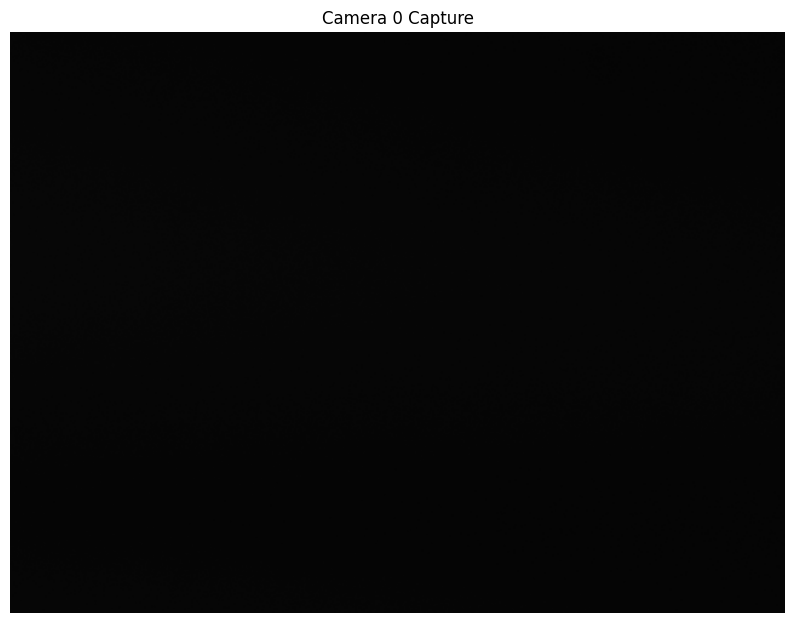

In [9]:
if cap.isOpened():
    ret, frame = cap.read()

    if not ret:
        print('Error: Failed to capture frame.')
    else:
        print('Frame captured successfully.')
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        plt.figure(figsize=(10, 8))
        plt.imshow(frame_rgb)
        plt.title(f'Camera {camera_index} Capture')
        plt.axis('off')
        plt.show()
else:
    print('Camera not open.')


In [16]:
if cap.isOpened():
    cap.release()
    print(f'Camera {camera_index} released.')
    # Optional check
    print(f'Is camera open? {cap.isOpened()}')


Camera 0 released.
Is camera open? False


## Attempting to control everything V4L2 tells us is available

In [15]:
def set_camera_controls():
    """Sets camera controls based on v4l2-ctl output and verifies the set values."""

    # cap = cv2.VideoCapture(0)  # Open the default camera (usually index 0)
    if not cap.isOpened():
        print("Error: Could not open camera.")
        return

    controls_data = {
        "brightness": 32,
        "contrast": 100,
        "saturation": 100,
        "white_balance_automatic": 1,
        "gain": 200,
        "power_line_frequency": 2,
        "white_balance_temperature": 2460,
        "sharpness": 24,
        "backlight_compensation": 0,
        "auto_exposure": 3,
        "exposure_time_absolute": 100,
        "exposure_dynamic_framerate": 1,
    }

    opencv_properties = {
        "brightness": cv2.CAP_PROP_BRIGHTNESS,
        "contrast": cv2.CAP_PROP_CONTRAST,
        "saturation": cv2.CAP_PROP_SATURATION,
        "white_balance_automatic": cv2.CAP_PROP_AUTO_WB,
        "gain": cv2.CAP_PROP_GAIN,
        "white_balance_temperature": cv2.CAP_PROP_WB_TEMPERATURE,
        "sharpness": cv2.CAP_PROP_SHARPNESS,
        "backlight_compensation": cv2.CAP_PROP_BACKLIGHT,
        "auto_exposure": cv2.CAP_PROP_AUTO_EXPOSURE,
        "exposure_time_absolute": cv2.CAP_PROP_EXPOSURE,
    }

    # Set and verify user controls
    for control_name, requested_value in controls_data.items():
        if control_name in opencv_properties:
            property_id = opencv_properties[control_name]
            set_successful = False
            if control_name == "white_balance_automatic":
                actual_value = cap.get(property_id)
                print(f"BEFORE {control_name} value: {actual_value}")
                cap.set(property_id, requested_value)
                set_successful = True
                print(f"Attempted to set {control_name} to: {requested_value}")
            elif control_name == "auto_exposure":
                if requested_value == 3:
                    actual_value = cap.get(property_id)
                    print(f"BEFORE {control_name} value: {actual_value}")
                    cap.set(property_id, 0.75)
                    set_successful = True
                    print(f"Attempted to set {control_name} to: Aperture Priority Mode (OpenCV value: 0.75)")
                else:
                    print(f"Warning: Could not directly map v4l2-ctl value {requested_value} for {control_name}.")
            else:
                actual_value = cap.get(property_id)
                print(f"BEFORE {control_name} value: {actual_value}")
                if cap.set(property_id, float(requested_value)):
                    set_successful = True
                    print(f"Attempted to set {control_name} to: {requested_value}")
                else:
                    print(f"Warning: Could not set {control_name} to {requested_value}.")

            if set_successful and control_name in opencv_properties:
                actual_value = cap.get(property_id)
                print(f"Actual {control_name} value: {actual_value}")
        elif control_name == "exposure_dynamic_framerate":
            print(f"Note: Cannot directly set or get '{control_name}' via standard OpenCV properties.")
        else:
            print(f"Warning: Control '{control_name}' not found in OpenCV properties.")

    # cap.release()
    print("Camera control setting and verification complete.")

if __name__ == "__main__":
    set_camera_controls()

BEFORE brightness value: 128.0
Attempted to set brightness to: 32
Actual brightness value: 32.0
BEFORE contrast value: -1.0
BEFORE saturation value: -1.0
BEFORE white_balance_automatic value: -1.0
Attempted to set white_balance_automatic to: 1
Actual white_balance_automatic value: -1.0
BEFORE gain value: -1.0
BEFORE white_balance_temperature value: -1.0
BEFORE sharpness value: -1.0
BEFORE backlight_compensation value: -1.0
BEFORE auto_exposure value: -1.0
Attempted to set auto_exposure to: Aperture Priority Mode (OpenCV value: 0.75)
Actual auto_exposure value: -1.0
BEFORE exposure_time_absolute value: -1.0
Note: Cannot directly set or get 'exposure_dynamic_framerate' via standard OpenCV properties.
Camera control setting and verification complete.


## Camera parameter callibration

Performing 5 captures to clear any cached frames...
Cache clean-up complete.
Starting image capture loop...
Setting: Brightness=0, Contrast=0
Performing 5 captures to clear any cached frames...
Cache clean-up complete.
Reading: Brightness=0.0, Contrast=0.0
Setting: Brightness=25, Contrast=0
Performing 5 captures to clear any cached frames...
Cache clean-up complete.
Reading: Brightness=25.0, Contrast=0.0
Setting: Brightness=51, Contrast=0
Performing 5 captures to clear any cached frames...
Cache clean-up complete.
Reading: Brightness=51.0, Contrast=0.0
Setting: Brightness=76, Contrast=0
Performing 5 captures to clear any cached frames...
Cache clean-up complete.
Reading: Brightness=76.0, Contrast=0.0
Setting: Brightness=102, Contrast=0
Performing 5 captures to clear any cached frames...
Cache clean-up complete.
Reading: Brightness=102.0, Contrast=0.0
Setting: Brightness=127, Contrast=0
Performing 5 captures to clear any cached frames...
Cache clean-up complete.
Reading: Brightness=127.

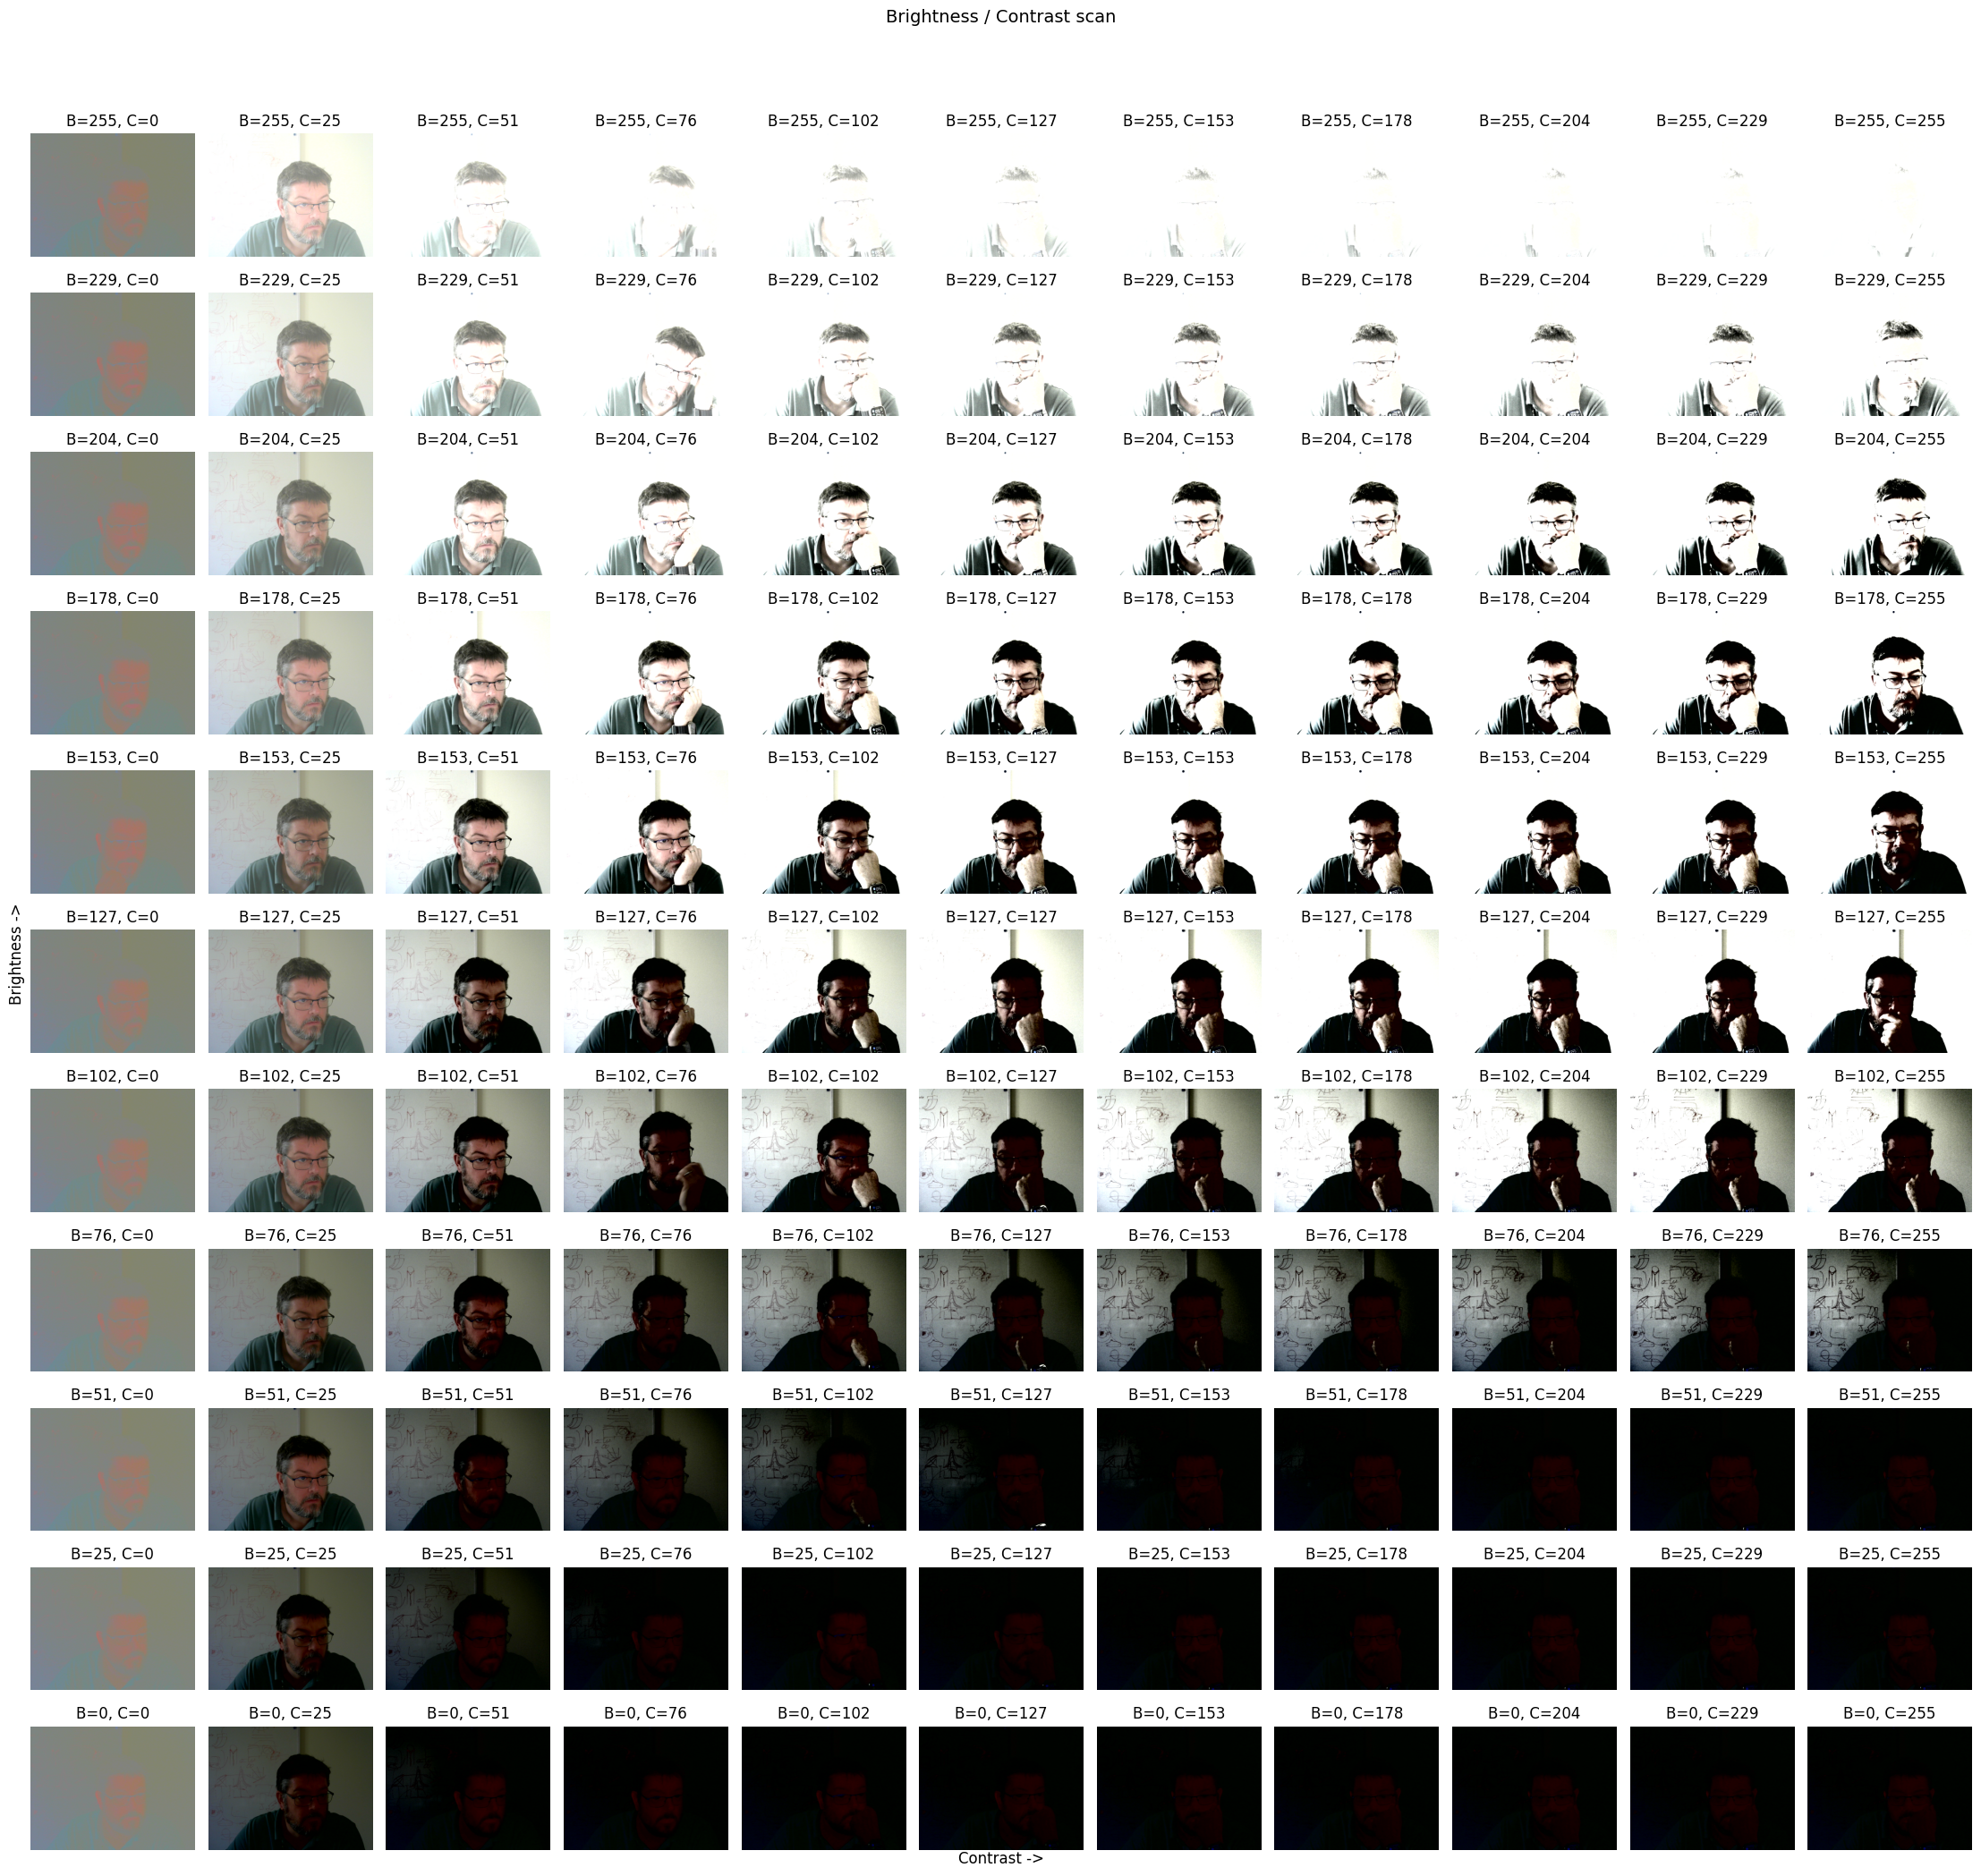

In [ ]:
brightness_values = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
contrast_values = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
output_folder = Path('camera_callibration')
save_images = False

camera_index = 0
clear_buffer_frames = 5
capture_delay_s = 0.5

# --- Parameter Grid ---
b_grid, c_grid = np.meshgrid(brightness_values, contrast_values)
param_combinations = zip(b_grid.flatten(), c_grid.flatten())

output_folder.mkdir(parents=True, exist_ok=True)

cap = cv2.VideoCapture(camera_index)

if not cap.isOpened():
    print(f'Error: Could not open camera {camera_index}.')
    exit()

# --- Clear camera buffer ---
print(f'Performing {clear_buffer_frames} captures to clear any cached frames...')
for i in range(clear_buffer_frames):
    ret_warmup, _ = cap.read()  # Read and discard the frame
    if not ret_warmup:
        print(f'[WARN] Clear buffer frame {i + 1} capture failed. Continuing...')
        time.sleep(0.5)
    else:
        time.sleep(0.1)
print('Buffer clean-up complete.')

captured_data = {}  # key=(b, c), value=image_data

print('Starting image capture loop...')

for b_val, c_val in param_combinations:
    # --- Set Camera Parameters ---
    # IMPORTANT: Logitech USB camera uses 0-255 for brightness and contrast.
    try:
        normalized_brightness = int(b_val * 255)
    except (ZeroDivisionError, OverflowError):
        normalized_brightness = 0
    try:
        normalized_contrast = int(c_val * 255)
    except (ZeroDivisionError, OverflowError):
        normalized_contrast = 0
    print(f'Setting: Brightness={normalized_brightness}, Contrast={normalized_contrast}')

    # Attempt to set brightness and contrast
    cap.set(cv2.CAP_PROP_BRIGHTNESS, normalized_brightness)
    cap.set(cv2.CAP_PROP_CONTRAST, normalized_contrast)

    # Allow some time for the settings to take effect
    time.sleep(capture_delay_s)

    # --- Clear camera buffer ---
    print(f'Performing {clear_buffer_frames} captures to clear any cached frames...')
    for i in range(clear_buffer_frames):
        ret_warmup, _ = cap.read()  # Read and discard the frame
        if not ret_warmup:
            print(f'[WARN] Clear buffer frame {i + 1} capture failed. Continuing...')
            time.sleep(0.5)
        else:
            time.sleep(0.1)
    print('Buffer clean-up complete.')

    print(f'Reading: Brightness={cap.get(cv2.CAP_PROP_BRIGHTNESS)}, Contrast={cap.get(cv2.CAP_PROP_CONTRAST)}')

    ret, frame = cap.read()

    if not ret:
        print(f'Warning: Failed to capture frame for B={b_val}, C={c_val}')
        continue  # Skip this combination if capture failed

    if save_images:
        filename = f'brightness_{normalized_brightness}_contrast_{normalized_contrast}.png'
        filepath = Path(output_folder, filename)
        cv2.imwrite(filepath.as_posix(), frame)
        print(f'  Saved: {filepath}')

    captured_data[(b_val, c_val)] = frame

print('Finished capturing. Releasing camera.')
cap.release()

print('Generating plot...')
num_b = len(brightness_values)
num_c = len(contrast_values)

fig, axes = plt.subplots(num_b, num_c, figsize=(num_c * 2, num_b * 2))

# Ensure axes is always a 2D array for consistent indexing
if num_b == 1 and num_c == 1:
    axes = np.array([[axes]])
elif num_b == 1:
    axes = np.array([axes])
elif num_c == 1:
    axes = axes.reshape(-1, 1)


for idx_b, b_val in enumerate(brightness_values):
    for idx_c, c_val in enumerate(contrast_values):
        param_key = (b_val, c_val)

        if param_key in captured_data:
            image_bgr = captured_data[param_key]

            image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

            # --- Calculate subplot indices ---
            row_idx = (num_b - 1) - idx_b
            col_idx = idx_c

            try:
                normalized_brightness = int(b_val * 255)
            except (ZeroDivisionError, OverflowError):
                normalized_brightness = 0
            try:
                normalized_contrast = int(c_val * 255)
            except (ZeroDivisionError, OverflowError):
                normalized_contrast = 0

            ax = axes[row_idx, col_idx]
            ax.imshow(image_rgb)
            ax.set_title(f'B={normalized_brightness}, C={normalized_contrast}')
            ax.axis('off')
        else:
            row_idx = num_b - 1 - idx_b
            col_idx = idx_c
            ax = axes[row_idx, col_idx]
            ax.set_title(f'B={normalized_brightness}, C={normalized_contrast}\n(No Image)')
            ax.axis('off')


fig.suptitle('Brightness / Contrast scan', fontsize=14)
# Add axes labels (optional, as individual titles show values)
# Note: These labels appear outside the subplot grid
fig.text(0.5, 0.04, 'Contrast ->', ha='center', va='center', fontsize=12)
fig.text(0.00, 0.5, 'Brightness ->', ha='center', va='center', rotation='vertical', fontsize=12)


plt.tight_layout(rect=(0.0, 0.03, 1.0, 0.95))  # Adjust layout to prevent title overlap
plt.savefig(Path(output_folder, 'camera_param_grid.png'), dpi=300)
# plt.show()

print('Done.')


Output will be in: unitive_camera_parameter_scan

--- Configuring Camera Settings (based on v4l2-ctl) ---
--- Finished Camera Configuration ---

Performing 5 initial captures to clear buffer...
Initial buffer clear complete.

Starting image capture loop...

Setting Brightness: 0 (~0.0 ms)
  Reading back Brightness: 0.0 (Target was: 0)
  Capturing final frame...

Setting Brightness: 50 (~5.0 ms)
  Reading back Brightness: 50.0 (Target was: 50)
  Capturing final frame...

Setting Brightness: 100 (~10.0 ms)
  Reading back Brightness: 100.0 (Target was: 100)
  Capturing final frame...

Setting Brightness: 150 (~15.0 ms)
  Reading back Brightness: 150.0 (Target was: 150)
  Capturing final frame...

Setting Brightness: 200 (~20.0 ms)
  Reading back Brightness: 200.0 (Target was: 200)
  Capturing final frame...

Setting Brightness: 255 (~25.5 ms)
  Reading back Brightness: 255.0 (Target was: 255)
  Capturing final frame...

Finished capturing. Releasing camera.
Generating plot...
Done.


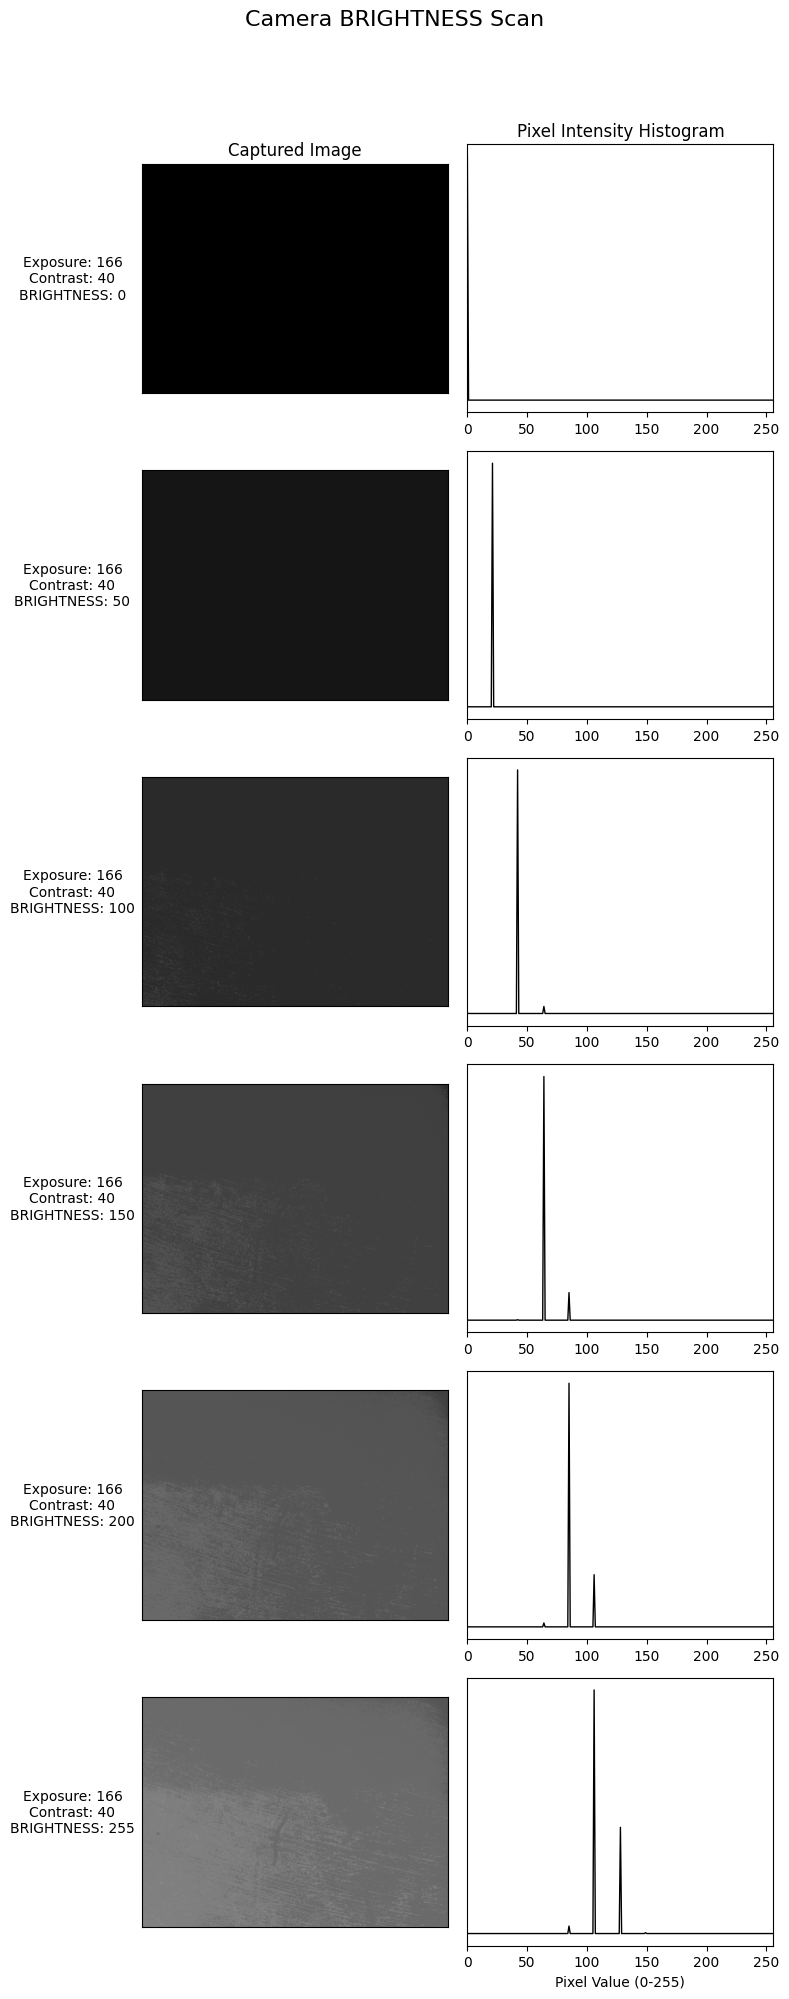

In [6]:
# Exposure Time: exposure_time_absolute (0x009a0902), range 1-10000.
# Unit is often 100 microseconds (0.1 ms).
# Examples: 10=1ms, 100=10ms, 1000=100ms, 10000=1s
# exposure_values = [
#     1,  # 0.1 ms (very short)
#     2,  # 0.2 ms (very short)
#     5,  # 0.5 ms (very short)
#     10,  # 1 ms (very short)
#     50,  # 5 ms
#     100,  # 10 ms (1/100 s)
#     166,  # Default value (approx 1/60 s)
#     333,  # Approx 1/30 s
#     500,  # 50 ms (1/20 s)
# ]
exposure_values = [
    166,  # Default value (approx 1/60 s)
    180,  # Approx 1/55 s
    200,  # Approx 1/50 s
    225,  # Approx 1/45 s
    250,  # Approx 1/40 s
    275,  # Approx 1/36 s
    300,  # Approx 1/33 s
    333,  # Approx 1/30 s
]

contrast_values = [
    25,
    30,
    35,
    40,
    45,
    50,
]

brightness_values = [
    0,
    50,
    100,
    150,
    200,
    255,
]

# param = 'EXPOSURE'
# values = exposure_values

# param = 'CONTRAST'
# values = contrast_values

param = 'BRIGHTNESS'
values = brightness_values

gain_fixed_value = 32

exposure = 166
brightness = 170
contrast = 40

# Sort values just in case they were entered out of order
exposure_values.sort()
contrast_values.sort()
brightness_values.sort()


output_folder = Path('unitive_camera_parameter_scan')
save_images = False

camera_index = 0
clear_buffer_frames = 5
capture_delay_s = 0.2

# --- Setup ---
output_folder.mkdir(parents=True, exist_ok=True)
print(f'Output will be in: {output_folder}')

# Use API Preference: Try to use V4L2 backend explicitly if possible on Linux
# cap = cv2.VideoCapture(camera_index, cv2.CAP_V4L2)
cap = cv2.VideoCapture(camera_index)
# Fallback to default if V4L2 backend isn't available/fails
if not cap.isOpened():
    print('[WARN] Failed to open camera with V4L2 backend, trying default.')
    cap = cv2.VideoCapture(camera_index)

# Add a small delay after initializing the camera
time.sleep(2)

if not cap.isOpened():
    print(f'Error: Could not open camera {camera_index}.')
    exit()

print('\n--- Configuring Camera Settings (based on v4l2-ctl) ---')

# # 1. Disable Auto Exposure: auto_exposure (0x009a0901) = 1 for Manual Mode
# #    (v4l2 value 3 = Aperture Priority, 1 = Manual Mode)
# print('Setting Manual Exposure mode (val=1)...')
# success_auto_exp = cap.set(cv2.CAP_PROP_AUTO_EXPOSURE, 1)
# if not success_auto_exp:
#     print('[WARN] Could not set CAP_PROP_AUTO_EXPOSURE to Manual (1).')
# else:
#     # Verify
#     current_auto_exp = cap.get(cv2.CAP_PROP_AUTO_EXPOSURE)
#     print(f'  CAP_PROP_AUTO_EXPOSURE is now: {current_auto_exp} (Expected 1 for Manual)')
#     if current_auto_exp != 1:
#         print(
#             '  [WARN] Auto exposure mode did not stick to Manual (1). Exposure control may fail.'
#         )

# # 2. Disable Auto White Balance: white_balance_automatic (0x0098090c) = 0 for Manual
# print('Setting Manual White Balance mode (val=0)...')
# success_auto_wb = cap.set(cv2.CAP_PROP_AUTO_WB, 0)
# if not success_auto_wb:
#     print('[WARN] Could not disable CAP_PROP_AUTO_WB.')
# else:
#     # Set fixed White Balance Temperature: white_balance_temperature (0x0098091a) = 4000 (default)
#     # Note: This might only work if Auto WB is successfully disabled (inactive flag in v4l2)
#     wb_temp_default = 4000
#     print(f'Setting fixed White Balance Temperature to {wb_temp_default}...')
#     success_wb_temp = cap.set(cv2.CAP_PROP_WB_TEMPERATURE, wb_temp_default)
#     if not success_wb_temp:
#         print(f'  [WARN] Could not set CAP_PROP_WB_TEMPERATURE to {wb_temp_default}.')
#     else:
#         print(f'  [INFO] CAP_PROP_WB_TEMPERATURE set to: {cap.get(cv2.CAP_PROP_WB_TEMPERATURE)}')


# # 3a. Set Fixed Gain: gain, range 0-255, default=64
# print(f'Setting fixed Gain to {gain_fixed_value}...')
# success_gain = cap.set(cv2.CAP_PROP_GAIN, gain_fixed_value)
# if not success_gain:
#     print(f'  [WARN] Could not set CAP_PROP_GAIN to {gain_fixed_value}.')
# else:
#     print(f'  [INFO] CAP_PROP_GAIN set to: {cap.get(cv2.CAP_PROP_GAIN)}')

# # 3b. Set Exposure: exposure
# print(f'Setting exposure to {exposure}...')
# success_exp = cap.set(cv2.CAP_PROP_EXPOSURE, exposure)
# if not success_exp:
#     print(f'  [WARN] Could not set CAP_PROP_EXPOSURE to {exposure}.')
# else:
#     print(f'  [INFO] CAP_PROP_EXPOSURE set to: {cap.get(cv2.CAP_PROP_EXPOSURE)}')

# # 3c. Set Brightness: brightness
# print(f'Setting brightness to {brightness}...')
# success_bri = cap.set(cv2.CAP_PROP_BRIGHTNESS, brightness)
# if not success_bri:
#     print(f'  [WARN] Could not set CAP_PROP_BRIGHTNESS to {brightness}.')
# else:
#     print(f'  [INFO] CAP_PROP_BRIGHTNESS set to: {cap.get(cv2.CAP_PROP_BRIGHTNESS)}')

# # 3d. Set Contrast: contrast
# print(f'Setting contrast to {contrast}...')
# success_con = cap.set(cv2.CAP_PROP_CONTRAST, contrast)
# if not success_con:
#     print(f'  [WARN] Could not set CAP_PROP_CONTRAST to {contrast}.')
# else:
#     print(f'  [INFO] CAP_PROP_CONTRAST set to: {cap.get(cv2.CAP_PROP_CONTRAST)}')

# 3e. Set RGB Conversion: cv2.CAP_PROP_CONVERT_RGB
# rgb_conversion = 0  # 0 = No conversion, 1 = Convert to RGB
# print(f'Setting RGB conversion to {rgb_conversion}...')
# success_rgb = cap.set(cv2.CAP_PROP_CONVERT_RGB, rgb_conversion)
# if not success_rgb:
#     print(f'  [WARN] Could not set CAP_PROP_CONVERT_RGB to {rgb_conversion}.')
# else:
#     print(f'  [INFO] CAP_PROP_CONVERT_RGB set to: {cap.get(cv2.CAP_PROP_CONVERT_RGB)}')

print('--- Finished Camera Configuration ---')

# --- Initial Buffer Clean-up ---
print(f'\nPerforming {clear_buffer_frames} initial captures to clear buffer...')
for i in range(clear_buffer_frames):
    ret_warmup, _ = cap.read()
    if not ret_warmup:
        print(f'[WARN] Initial clear frame {i + 1} capture failed.')
    time.sleep(0.1)  # Shorter delay between reads okay here
print('Initial buffer clear complete.')


# --- Data Storage ---
captured_data = []  # Store tuples of (exposure_value, image_data)

print('\nStarting image capture loop...')

# --- Capture Loop ---
for val in values:

    match param:
        case 'EXPOSURE':
            print(f'\nSetting Exposure Time (Absolute): {val} (~{val * 0.1:.1f} ms)')

            success_exp = cap.set(cv2.CAP_PROP_EXPOSURE, int(val))
            if not success_exp:
                print(f'  [WARN] Failed to set Exposure to {val}. Skipping this value.')
                continue

            time.sleep(0.5)
            current_exposure = cap.get(cv2.CAP_PROP_EXPOSURE)
            print(f'  Reading back Exposure: {current_exposure} (Target was: {val})')
        case 'CONTRAST':
            print(f'\nSetting Contrast: {val} (~{val * 0.1:.1f} ms)')

            success_exp = cap.set(cv2.CAP_PROP_CONTRAST, int(val))
            if not success_exp:
                print(f'  [WARN] Failed to set Contrast to {int(val)}. Skipping this value.')
                continue

            time.sleep(0.5)
            current_exposure = cap.get(cv2.CAP_PROP_CONTRAST)
            print(f'  Reading back Contrast: {current_exposure} (Target was: {int(val)})')
        case 'BRIGHTNESS':
            print(f'\nSetting Brightness: {val} (~{val * 0.1:.1f} ms)')

            success_brightness = cap.set(cv2.CAP_PROP_BRIGHTNESS, int(val))
            if not success_brightness:
                print(f'  [WARN] Failed to set Brightness to {int(val)}. Skipping this value.')
                continue

            time.sleep(0.5)
            current_brightness = cap.get(cv2.CAP_PROP_BRIGHTNESS)
            print(f'  Reading back Brightness: {current_brightness} (Target was: {int(val)})')

    time.sleep(capture_delay_s)

    for i in range(clear_buffer_frames):
        ret_cache, _ = cap.read()
        if not ret_cache:
            print(f'  [WARN] Cache clear frame {i + 1} failed.')

    print(f'  Capturing final frame...')
    ret, frame = cap.read()

    frame = frame.astype(np.uint16)
    frame = np.bitwise_and(frame, 0x0FFF)
    frame = cv2.normalize(
        frame, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U # type: ignore[arg-type]
    )

    if not ret or frame is None:
        print(f'  [ERROR] Failed to capture frame')
        continue

    captured_data.append((val, frame.copy()))

    if save_images:
        filename = f'{param}_{int(val)}.png'
        filepath = Path(output_folder, filename)
        try:
            cv2.imwrite(str(filepath), frame)
            print(f'  Saved: {filepath}')
        except Exception as e:
            print(f'  [ERROR] Failed to save image {filepath}: {e}')


print('\nFinished capturing. Releasing camera.')
cap.release()

if not captured_data:
    print('No images were captured successfully. Exiting plot generation.')
    exit()

print('Generating plot...')
num_frames = len(captured_data)
num_cols = 2

fig, axes = plt.subplots(
    num_frames, num_cols, figsize=(num_cols * 4, num_frames * 3.5)
)

if num_frames == 1:
    axes = np.array([axes])

fig.suptitle(f'Camera {param} Scan', fontsize=16)

for idx, (exp_val, image_bgr) in enumerate(captured_data):
    ax_image = axes[idx, 0]
    ax_hist = axes[idx, 1]

    image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
    ax_image.imshow(image_rgb)

    # ax_image.imshow(image_bgr)

    match param:
        case 'EXPOSURE':
            message = f'{param}: {int(exp_val)}'
            message = '\n'.join([message, f'Contrast: {int(contrast)}'])
            message = '\n'.join([message, f'Brightness: {int(brightness)}'])
        case 'CONTRAST':
            message = f'Exposure: {int(exposure)}'
            message = '\n'.join([message, f'{param}: {int(exp_val)}'])
            message = '\n'.join([message, f'Brightness: {int(brightness)}'])
        case 'BRIGHTNESS':
            message = f'Exposure: {int(exposure)}'
            message = '\n'.join([message, f'Contrast: {int(contrast)}'])
            message = '\n'.join([message, f'{param}: {int(exp_val)}'])

    ax_image.set_ylabel(
        message,
        rotation=0,
        size='medium',
        labelpad=50,
        va='center',
    )
    ax_image.set_xticks([])
    ax_image.set_yticks([])

    gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)
    hist = cv2.calcHist([gray], [0], None, [256], [0, 256])
    # hist = cv2.calcHist([image_bgr], [0], None, [256], [0, 256])
    ax_hist.plot(hist, color='black', linewidth=1.0)
    ax_hist.set_xlim([0, 256])
    ax_hist.set_yticks([])

    if idx == 0:
        ax_image.set_title('Captured Image')
        ax_hist.set_title('Pixel Intensity Histogram')
    if idx == num_frames - 1:
        ax_hist.set_xlabel('Pixel Value (0-255)')


plt.tight_layout(rect=(0, 0.03, 1, 0.95))
plot_filepath = Path(output_folder, f'{param}_scan.png')
plt.savefig(plot_filepath, dpi=200)

print('Done.')
